# Data exploration 🧐

The first step in any ML use case is to explore and get a feel for the data. 
In this notebook we therefore load, inspect and visualize the data.

We are using a [publicly available dataset](https://www.kaggle.com/datasets/berkerisen/wind-turbine-scada-dataset) of a wind turbine in Turkey which contains different values over time, such as the generated power.

Before you start: make sure you have selected the correct kernel in the top right corner of this notebook. This is the current Python interpreter (e.g. `Python 3.8.18`) if you're working in CodeSpaces, or it is called `.venv` if you've created a virtual environment in when setting up.
Can't find it? Try running:
```bash
ipython kernel install --name ".venv" --user
```
and reload the window with CMD/CTRL + SHIFT + P  >  "Developer: Reload Window".

You should find `.venv` under "Python Environments" in the dropdown when selecting the kernel: <br><br>
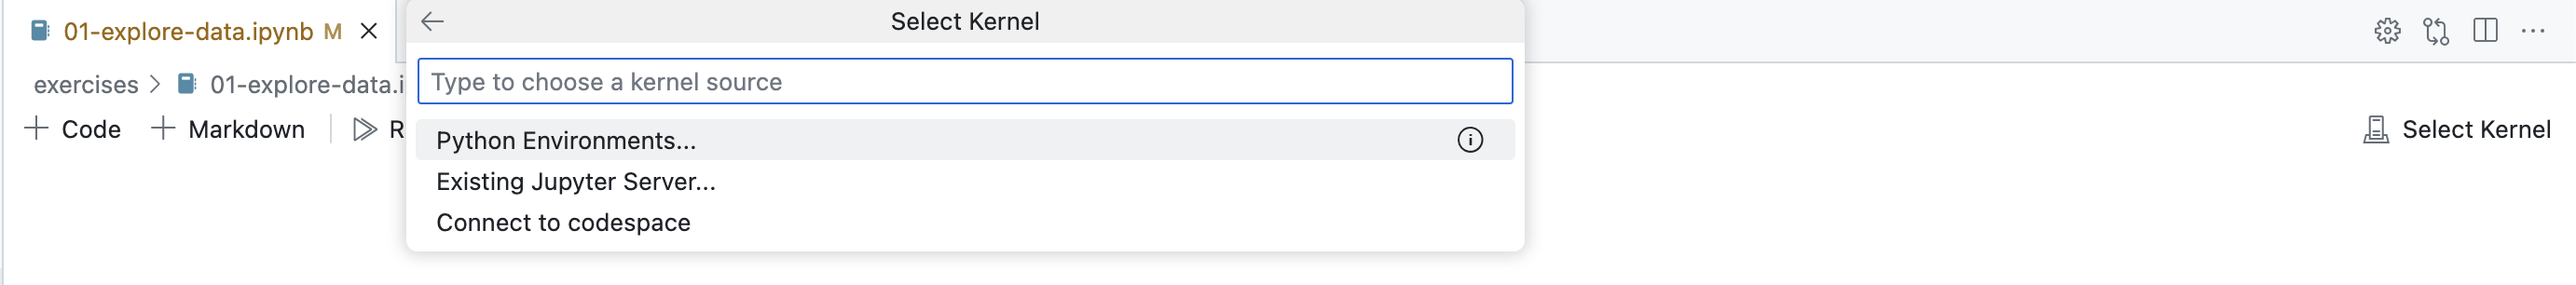

In [ ]:
import pandas as pd
import plotly_express as px

In [ ]:
data_path = "../data/turbine-data.csv"
data = pd.read_csv(data_path).set_index("timestamp")
data.index = pd.to_datetime(data.index)
data

It seems we have some columns specifying **wind speed** and **direction**, and a column specifying **how much power was generated** for those values. We also have a column indicating whether the turbine was **curtailed**. What would that mean?

Let's plot some attributes over time to get a better feel of the data.

In [ ]:
# Tip: you can select a region on the graph to zoom in on it
px.line(data, y="active_power", title="Generated power over time")

In [ ]:
# Tip: you can select a region on the graph to zoom in on it
fig = px.line(data, y="wind_speed", title="Wind speed over time")
fig.update_traces(line_color="orange")
fig

In [ ]:
fig = px.scatter(
    data, 
    x="wind_speed", 
    y="active_power",
    # color="is_curtailed",
    title="Relation between wind speed and power generated"
)
fig.update_layout(xaxis_title="Wind speed (m/s)", yaxis_title="Power")
fig

Generated power seems to go up, the harder the wind blows! <br>
Makes sense for a wind turbine...

Let's see if we can use this information to train a model that can predict the generated power, based on the available information about the circumstances, such as the wind speed.
We'll do this in the next exercise.
